<a href="https://colab.research.google.com/github/Akshita-Goel/Fake-News-Detection-and-Rumour-Control-/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FAKE NEWS DETECTION AND RUMOR CONTROL**

Importing the Data Dependencies

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading dataset
data_news = pd.read_csv('/content/drive/MyDrive/data_proj/train.csv.zip')

In [ ]:
data_news.shape

(20800, 5)

In [ ]:
# First 5 rows of dataframe
data_news.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# Count of the number of missing values in the given dataset
data_news.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# Replacing null values with an empty string
data_news = data_news.fillna('')

In [ ]:
# Merging the author name & news title
data_news['content'] = data_news['author']+' '+ data_news['title']

In [ ]:
print(data_news['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [ ]:
# Separating data & label
X = data_news.drop(columns='label', axis=1)
Y = data_news['label']

In [ ]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [ ]:
f_data = data_news.dropna()

In [ ]:
# Total null values present
f_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

<ipython-input-11-b15f8f01eb74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_data['length'] = f_data['title'].apply(len)


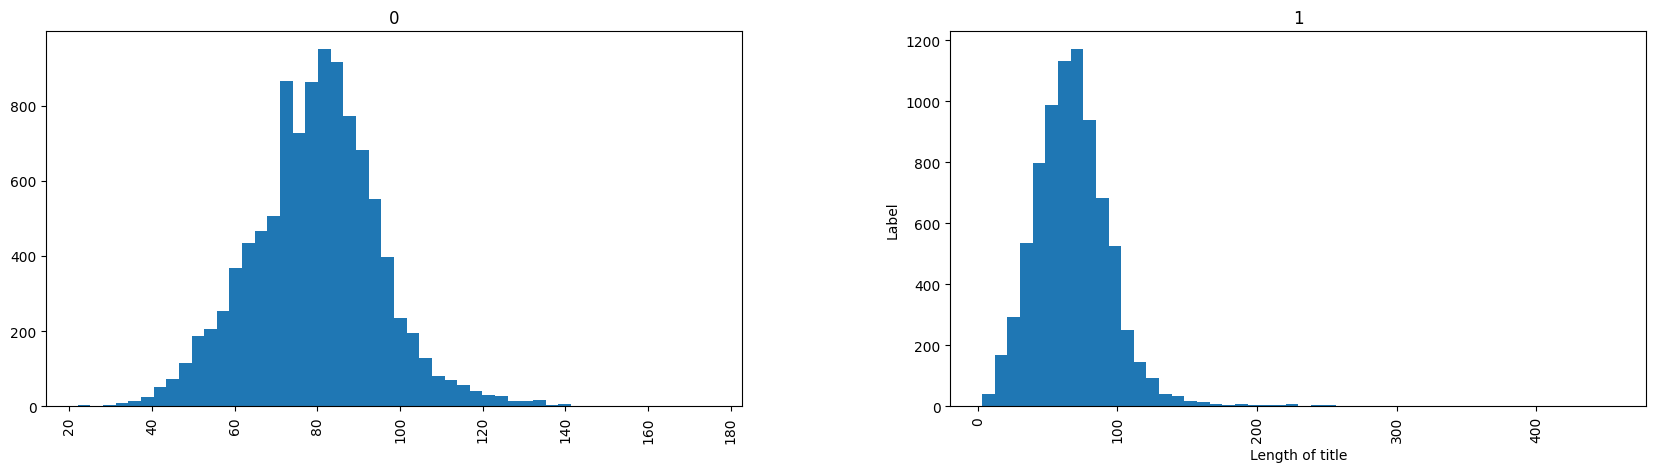

In [ ]:
# Histogram of the dataset
import matplotlib.pyplot as plt
f_data['length'] = f_data['title'].apply(len)
f_data.hist(column='length', by='label', figsize=(20,5), bins=50)
plt.xlabel('Length of title')
plt.ylabel('Label')
plt.show()

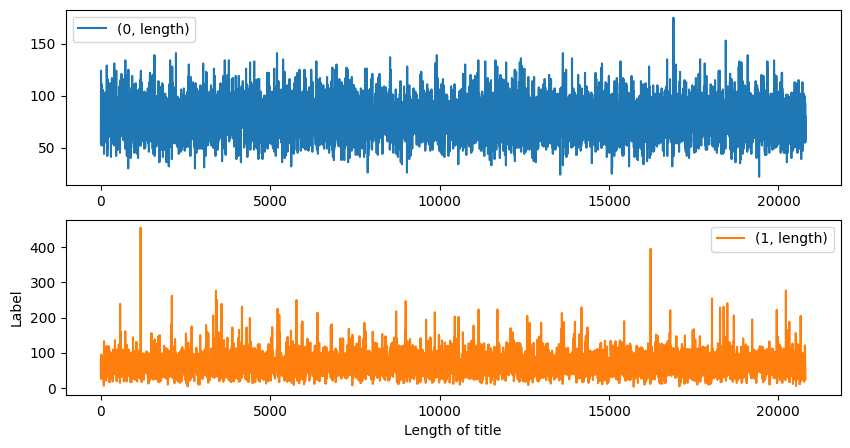

In [ ]:
# Visualization of data
f_data.plot(column='length', by='label', figsize=(10,5))
plt.xlabel('Length of title')
plt.ylabel('Label')
plt.show()

Stemming



In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [ ]:
from nltk.stem.porter import *
data_news['content'] = data_news['content'].apply(stemming)

In [ ]:
print(data_news['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [ ]:
# Separating data & label
X = data_news['content'].values
Y = data_news['label'].values

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:
Y.shape

(20800,)

In [ ]:
# Converting text to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

Dataset splitting into training data and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

Model Training

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Evaluation of accuracy

In [ ]:
# Accuracy of training data
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9865985576923076


In [ ]:
# Accuracy of test data
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


Making a Predictive System



In [ ]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real & Not a Rumor')
else:
  print('The news is Fake & Rumor')

[0]
The news is Real & Not a Rumor


In [ ]:
print(Y_test[3])

0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import copy
from nltk.corpus import stopwords

In [ ]:
# Removing punctuation marks from the title
import string
def text_process(title):
    nop = [char for char in title if char not in string.punctuation]
    nop = ''.join(nop)
    return [word for word in nop.split() if word in word.lower() not in stopwords.words('english')]

In [ ]:
# Using the Naive Model with its parameters
piplineTitle = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(f_data['title'], f_data['label'], test_size=0.2, random_state=123)

In [ ]:
# Fitting the dataset
print(piplineTitle.fit(x_train, y_train))

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7d46fb6b3910>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])


In [ ]:
Y_pred = piplineTitle.fit(x_train, y_train).predict(x_test)
Y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Using Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
print('Cnfusion Matrix',cnf_matrix)

Cnfusion Matrix [[ 165 1912]
 [ 181 1902]]


Text(95.72222222222221, 0.5, 'real & not rumor')

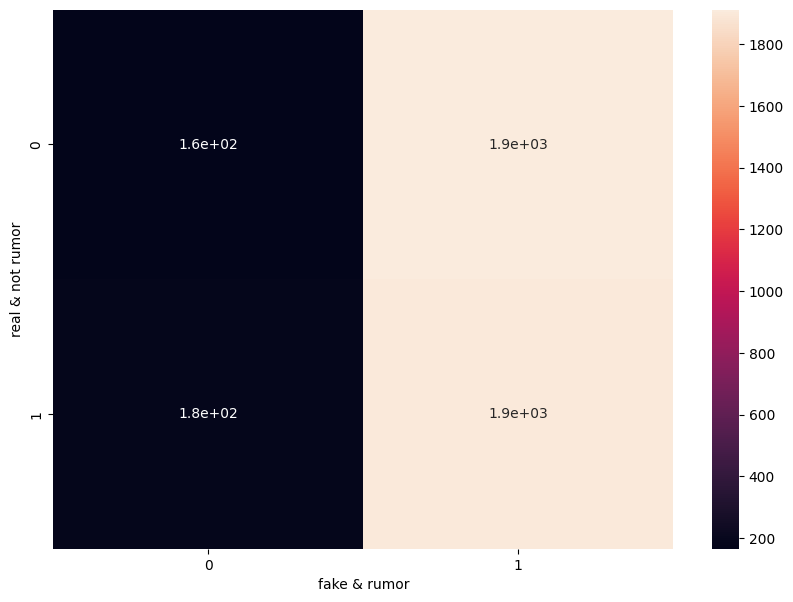

In [ ]:
# Visualization of results
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sns.heatmap(cnf_matrix, annot=True)
plt.xlabel('fake & rumor')
plt.ylabel('real & not rumor')